# Import Required Libraries
Import the necessary libraries, including Pandas and Matplotlib.

In [ ]:
!pip install pandas matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed within the notebook
%matplotlib inline

# Load the Dataset
Load the CSV file into a Pandas DataFrame.

D:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\CSV_lotto\lotto_prize_combined.csv

In [19]:
# Load the CSV file into a Pandas DataFrame
file_path = r'D:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\CSV_lotto\lotto_prize_combined.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df.head(2)

,date,prize_1st,prize_2digits,prize_pre_3digit,prize_sub_3digits,prize_2nd,prize_3rd,prize_4th,prize_5th
0,30-12-2549,['778584'],['07'],"['164', '403']","['811', '971']","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692...","['004495', '034106', '049904', '067124', '0692..."
1,16-01-2550,['838739'],['54'],"['263', '293']","['803', '845']","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248...","['011144', '015822', '018334', '018825', '0248..."


# Data Cleaning and Preparation
Clean and prepare the data for analysis, including handling missing values and converting data types.

In [18]:
# Data Cleaning and Preparation

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with a placeholder or appropriate value
df.fillna('N/A', inplace=True)

# Convert 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)

# Convert prize columns from string representation of lists to actual lists
import ast

prize_columns = ['prize_1st', 'prize_2digits', 'prize_pre_3digit', 'prize_sub_3digits', 'prize_2nd', 'prize_3rd', 'prize_4th', 'prize_5th']
for col in prize_columns:
    df[col] = df[col].apply(ast.literal_eval)

# Display the cleaned DataFrame
df.head()

Missing values in each column:
 date                 0
prize_1st            0
prize_2digits        0
prize_pre_3digit     0
prize_sub_3digits    0
prize_2nd            0
prize_3rd            0
prize_4th            0
prize_5th            0
dtype: int64


ValueError: malformed node or string: ['07']

# Visualize the Distribution of Numbers
Use Matplotlib to create visualizations of the distribution of numbers in the dataset.

In [8]:
!pip install numpy

# Find the Most Frequent Numbers
Analyze the dataset to find the most frequently occurring numbers.

# Find the Least Frequent Numbers
Analyze the dataset to find the least frequently occurring numbers.

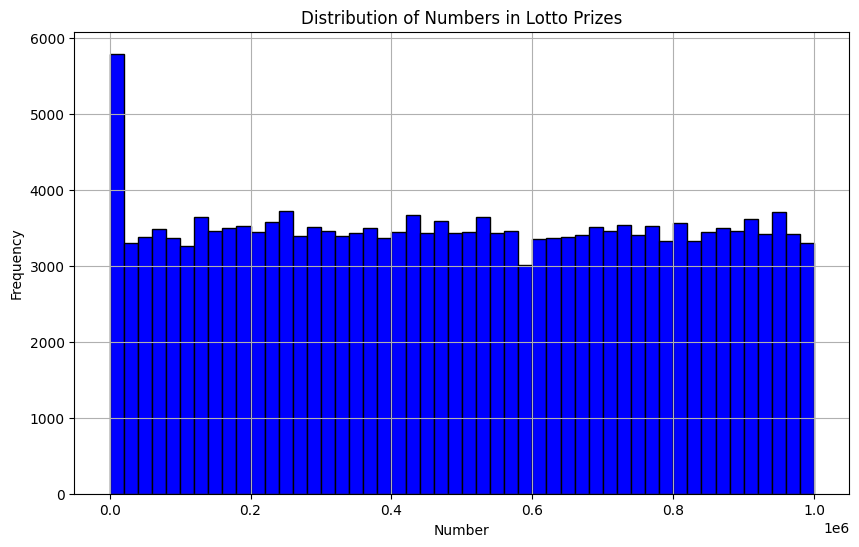

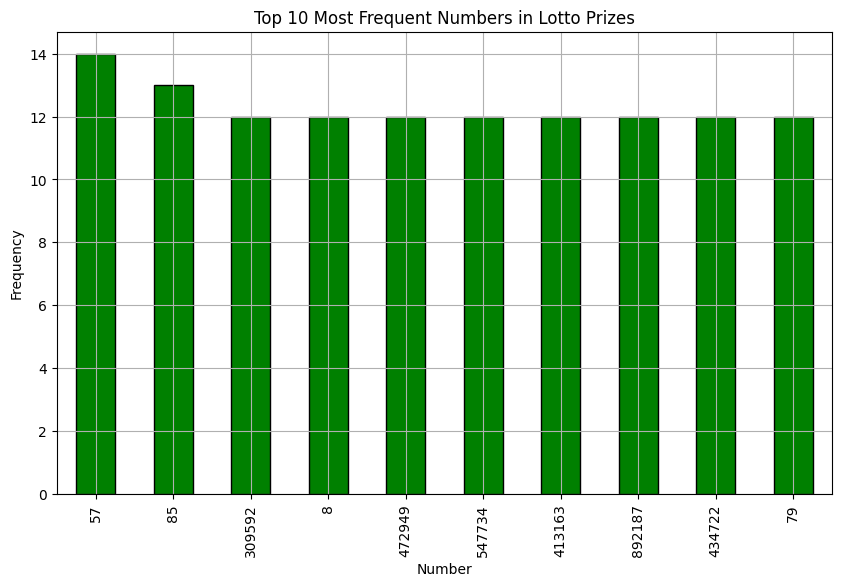

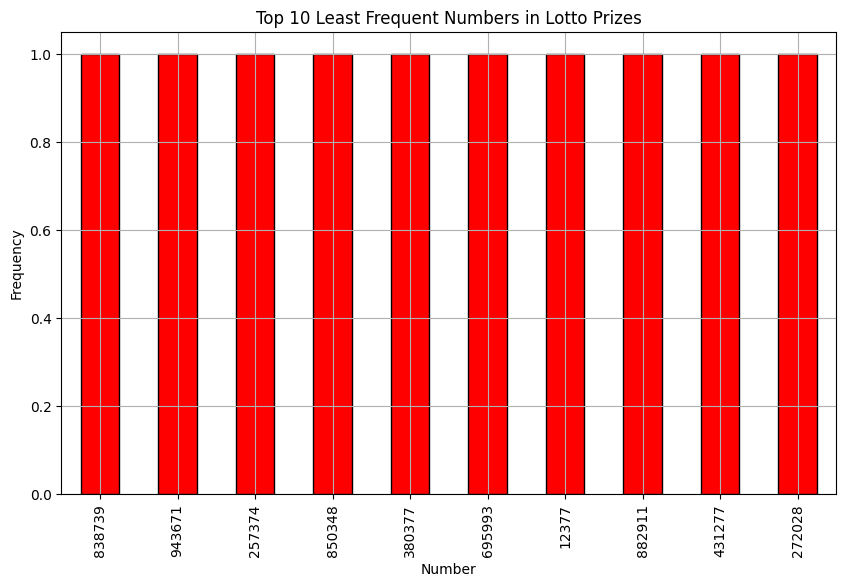

In [ ]:
import numpy as np

# Extract all numbers from the prize columns and flatten the list
all_numbers = []
for col in prize_columns:
    all_numbers.extend(df[col].explode().dropna().astype(int).tolist())

# Create a Pandas Series from the list of all numbers
numbers_series = pd.Series(all_numbers)

# Plot the distribution of numbers using a histogram
plt.figure(figsize=(10, 6))
plt.hist(numbers_series, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the top 10 most frequent numbers
top_10_numbers = numbers_series.value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_numbers.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Most Frequent Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the top 10 least frequent numbers
bottom_10_numbers = numbers_series.value_counts().tail(10)
plt.figure(figsize=(10, 6))
bottom_10_numbers.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Least Frequent Numbers in Lotto Prizes')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
df

,date,prize_1st,prize_2digits,prize_pre_3digit,prize_sub_3digits,prize_2nd,prize_3rd,prize_4th,prize_5th
0,30-12-2549,[778584],[7],"[164, 403]","[811, 971]","[4495, 34106, 49904, 67124, 69215, 70092, 1008...","[4495, 34106, 49904, 67124, 69215, 70092, 1008...","[4495, 34106, 49904, 67124, 69215, 70092, 1008...","[4495, 34106, 49904, 67124, 69215, 70092, 1008..."
1,16-01-2550,[838739],[54],"[263, 293]","[803, 845]","[11144, 15822, 18334, 18825, 24878, 43274, 492...","[11144, 15822, 18334, 18825, 24878, 43274, 492...","[11144, 15822, 18334, 18825, 24878, 43274, 492...","[11144, 15822, 18334, 18825, 24878, 43274, 492..."
2,01-02-2550,[769925],[56],"[239, 287]","[865, 893]","[954, 6142, 6208, 12651, 38257, 56633, 57416, ...","[954, 6142, 6208, 12651, 38257, 56633, 57416, ...","[954, 6142, 6208, 12651, 38257, 56633, 57416, ...","[954, 6142, 6208, 12651, 38257, 56633, 57416, ..."
3,16-02-2550,[277859],[95],"[384, 607]","[625, 979]","[10482, 13715, 18286, 47859, 53272, 56672, 726...","[10482, 13715, 18286, 47859, 53272, 56672, 726...","[10482, 13715, 18286, 47859, 53272, 56672, 726...","[10482, 13715, 18286, 47859, 53272, 56672, 726..."
4,01-03-2550,[742425],[61],"[294, 801]","[942, 949]","[1098, 16124, 25473, 39940, 40304, 45622, 8817...","[1098, 16124, 25473, 39940, 40304, 45622, 8817...","[1098, 16124, 25473, 39940, 40304, 45622, 8817...","[1098, 16124, 25473, 39940, 40304, 45622, 8817..."
...,...,...,...,...,...,...,...,...,...
427,16-12-2567,[97863],[21],"[290, 742]","[339, 881]","[720, 126272, 188327, 277818, 381363, 518176, ...","[720, 126272, 188327, 277818, 381363, 518176, ...","[720, 126272, 188327, 277818, 381363, 518176, ...","[720, 126272, 188327, 277818, 381363, 518176, ..."
428,02-01-2568,[730209],[51],"[446, 65]","[376, 297]","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454...","[107563, 826029, 943848, 833998, 765600, 18454..."
429,17-01-2568,[807779],[23],"[699, 961]","[448, 477]","[43279, 123993, 210295, 316422, 438472, 502170...","[43279, 123993, 210295, 316422, 438472, 502170...","[43279, 123993, 210295, 316422, 438472, 502170...","[43279, 123993, 210295, 316422, 438472, 502170..."
430,01-02-2568,[558700],[51],"[285, 418]","[685, 824]","[2886, 127745, 237637, 357324, 423932, 500656,...","[2886, 127745, 237637, 357324, 423932, 500656,...","[2886, 127745, 237637, 357324, 423932, 500656,...","[2886, 127745, 237637, 357324, 423932, 500656,..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               431 non-null    object
 1   prize_1st          431 non-null    object
 2   prize_2digits      431 non-null    object
 3   prize_pre_3digit   431 non-null    object
 4   prize_sub_3digits  431 non-null    object
 5   prize_2nd          431 non-null    object
 6   prize_3rd          431 non-null    object
 7   prize_4th          431 non-null    object
 8   prize_5th          431 non-null    object
dtypes: object(9)
memory usage: 30.4+ KB


In [38]:
df.describe

<bound method NDFrame.describe of            date   prize_1st prize_2digits prize_pre_3digit prize_sub_3digits  \
0    30-12-2549  ['778584']        ['07']   ['164', '403']    ['811', '971']   
1    16-01-2550  ['838739']        ['54']   ['263', '293']    ['803', '845']   
2    01-02-2550  ['769925']        ['56']   ['239', '287']    ['865', '893']   
3    16-02-2550  ['277859']        ['95']   ['384', '607']    ['625', '979']   
4    01-03-2550  ['742425']        ['61']   ['294', '801']    ['942', '949']   
..          ...         ...           ...              ...               ...   
426  16-12-2567  ['097863']        ['21']   ['290', '742']    ['339', '881']   
427  02-01-2568  ['730209']        ['51']   ['446', '065']    ['376', '297']   
428  17-01-2568  ['807779']        ['23']   ['699', '961']    ['448', '477']   
429  01-02-2568  ['558700']        ['51']   ['285', '418']    ['685', '824']   
430  16-02-2568  ['847377']        ['50']   ['268', '613']    ['652', '001']   

     

In [ ]:
df.prize_1st.value_counts()


prize_1st
['847377']    1
['778584']    1
['838739']    1
['769925']    1
['277859']    1
             ..
['032988']    1
['430667']    1
['499336']    1
['331810']    1
['476207']    1
Name: count, Length: 431, dtype: int64

In [42]:
df.prize_2digits.value_counts()

prize_2digits
['79']    11
['85']     9
['05']     8
['92']     8
['14']     8
          ..
['16']     2
['72']     1
['74']     1
['84']     1
['04']     1
Name: count, Length: 99, dtype: int64

# 2 ตัว

In [11]:
# Convert lists to strings, remove square brackets, single quotes, and split the string into individual numbers
df['prize_2digits'] = df['prize_2digits'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
df['prize_2digits'] = df['prize_2digits'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(',')

# Explode the list into separate rows and count the occurrences of each number
prize_2digits_counts = df['prize_2digits'].explode().value_counts()

print(prize_2digits_counts)

prize_2digits
79    11
85     9
05     8
92     8
14     8
      ..
16     2
72     1
74     1
84     1
04     1
Name: count, Length: 99, dtype: int64


In [ ]:
# Sort the prize_2digits_counts by frequency and then by index
prize_2digits_counts_sorted = prize_2digits_counts.sort_values(ascending=False).sort_index(key=lambda x: x.astype(int))

# Set the figure DPI for retina resolution
plt.rcParams['figure.dpi'] = 200

# Plot the frequency of prize_2digits_counts as a histogram
plt.figure(figsize=(20, 8))
colors = ['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values]
bars = plt.bar(prize_2digits_counts_sorted.index, prize_2digits_counts_sorted.values, color=colors, edgecolor='black')

# Add text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10, fontname='Gabriola')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=12, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(r'D:\RID_NATTAWUT\Coding\github_copilot\rich_huay\Data-Set-Thai-Lotto\img\frequency_prize_3_digits.png', dpi=300, bbox_inches='tight')

plt.show()


SyntaxError: positional argument follows keyword argument (1356559110.py, line 22)

In [ ]:
!pip install seaborn

C:\Users\ball-pc\AppData\Local\Temp\ipykernel_7972\2775292418.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=colors)


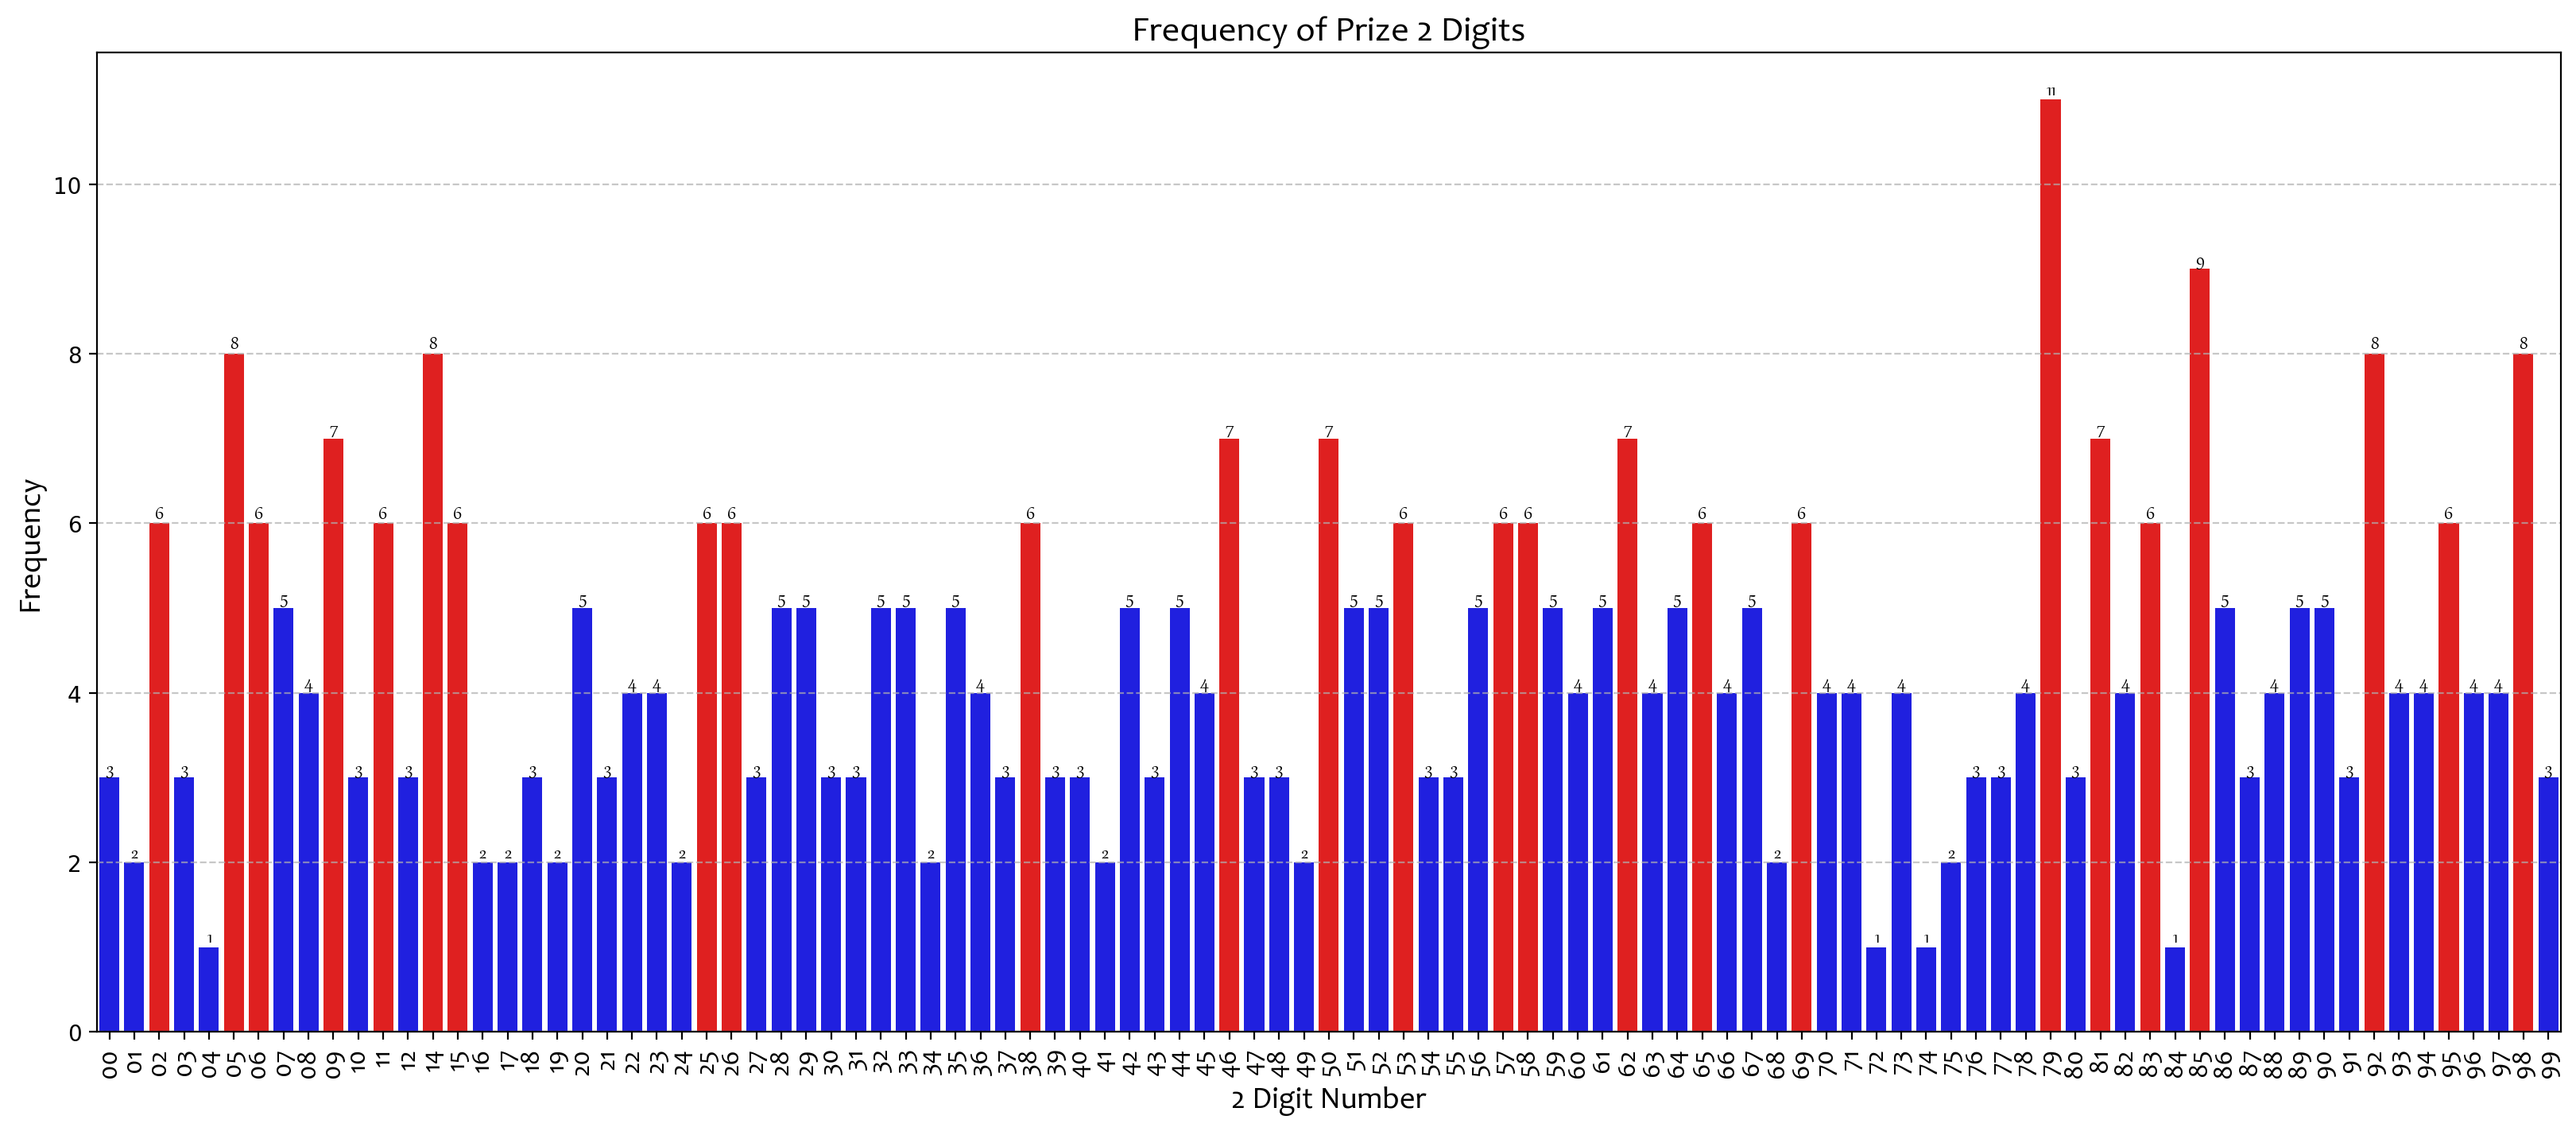

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the frequency of prize_2digits_counts_sorted as a bar plot using Seaborn
plt.figure(figsize=(20, 8))
colors = ['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values]
bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=colors)

# Add text labels on the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', 
                  (bar.get_x() + bar.get_width() / 2, yval), 
                  ha='center', va='bottom', 
                  fontsize=10, fontname='Gabriola')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=12, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('frequency_prize_2_digits.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\ball-pc\AppData\Local\Temp\ipykernel_7972\537768993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values])


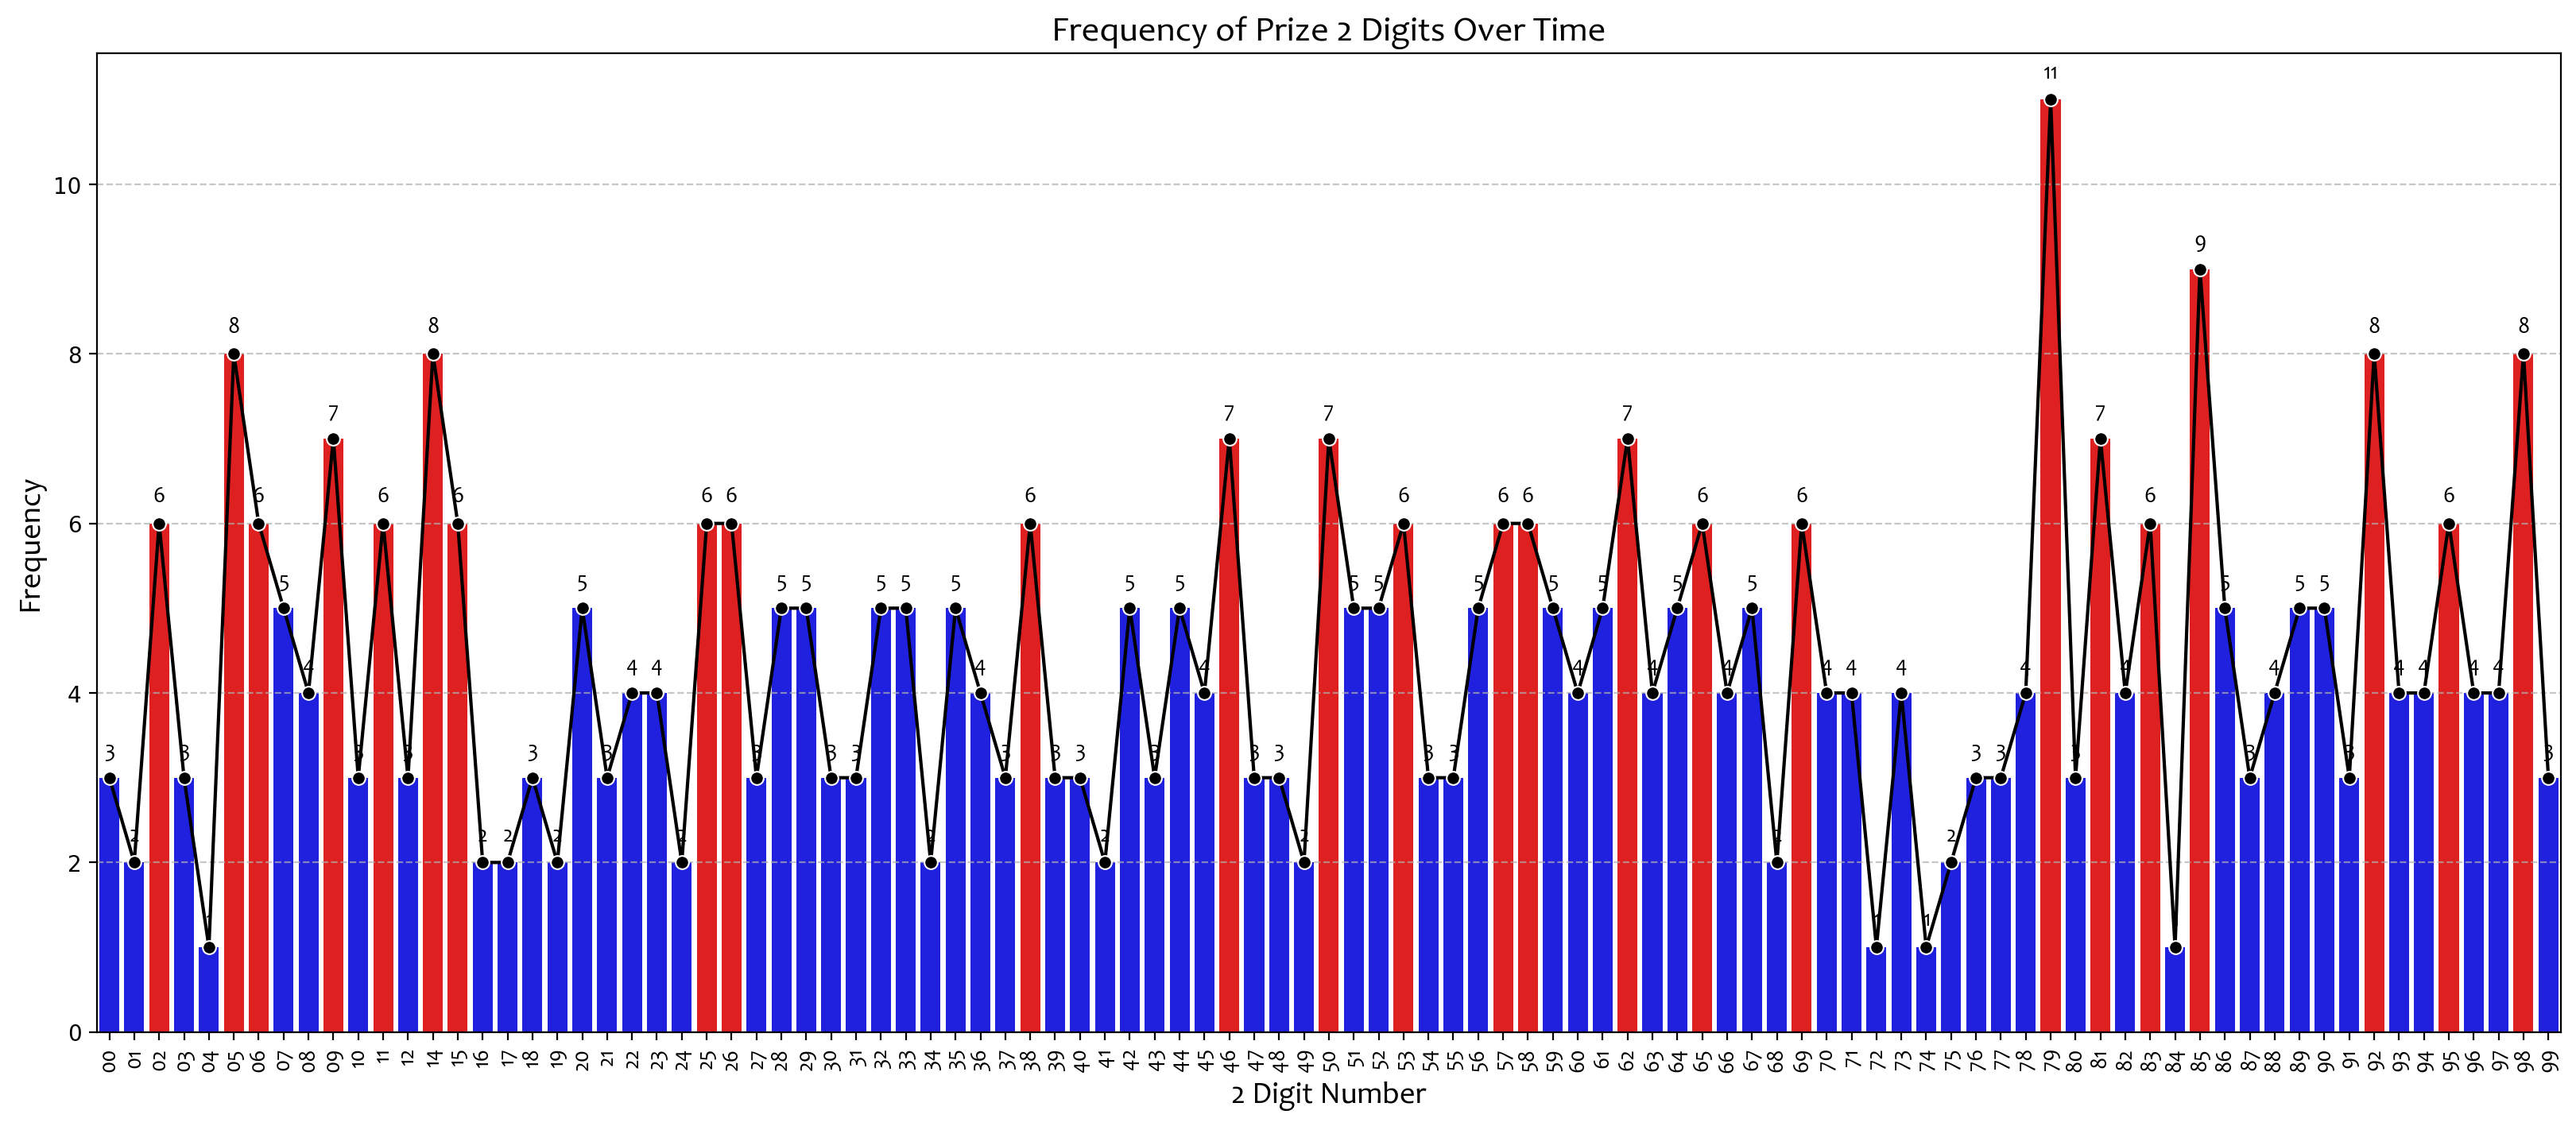

In [53]:
# Generate a Seaborn line plot for the frequency of prize_2digits_counts_sorted
plt.figure(figsize=(20, 8))
sns.lineplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, marker='o', color='black')
bars = sns.barplot(x=prize_2digits_counts_sorted.index, y=prize_2digits_counts_sorted.values, palette=['red' if freq > 5 else 'blue' for freq in prize_2digits_counts_sorted.values])

# Add text labels on the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', 
                  (bar.get_x() + bar.get_width() / 2, yval+.2), 
                  ha='center', va='bottom', 
                  fontsize=10, fontname='Candara')

fontname = 'Candara'
plt.title('Frequency of Prize 2 Digits Over Time', fontsize=16, fontname=fontname)
plt.xlabel('2 Digit Number', fontsize=14, fontname=fontname)
plt.ylabel('Frequency', fontsize=14, fontname=fontname)
plt.xticks(rotation=90, fontsize=10, fontname=fontname)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig(r'.\img\frequency_prize_4_digits_lineplot.png', dpi=300, bbox_inches='tight')

plt.show()